In [1]:
# 1.Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.82

In [2]:
# 2.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train AdaBoost regressor
regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate and print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae


78.61805360873889

In [3]:
# 3.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize and train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X, y)

# Get feature importances
feature_importances = gbc.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df.head(10)  # Show top 10 important features


,Feature,Importance
20,worst radius,0.443226
22,worst perimeter,0.150528
7,mean concave points,0.131765
27,worst concave points,0.126940
21,worst texture,0.035036
23,worst area,0.029426
1,mean texture,0.027852
26,worst concavity,0.013858
13,area error,0.008327
24,worst smoothness,0.007256


In [5]:
# 4.Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset (using California Housing as example purposes)
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.7756


In [6]:
# 5.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

# Step 4: Train Gradient Boosting Classifier (sklearn)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)

# Step 5: Output results
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9561
Gradient Boosting Accuracy: 0.9561


In [9]:
# 6.Train a CatBoost Classifier and evaluate using F1-Score

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train CatBoost Classifier
model = CatBoostClassifier(verbose=0)  # suppress training output
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.9790209790209791


In [11]:
# 7.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing # Changed from load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load dataset
housing = fetch_california_housing() # Changed from load_boston
X = housing.data
y = housing.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train XGBoost Regressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = model.predict(X_test)

# Step 5: Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.2225899267544737


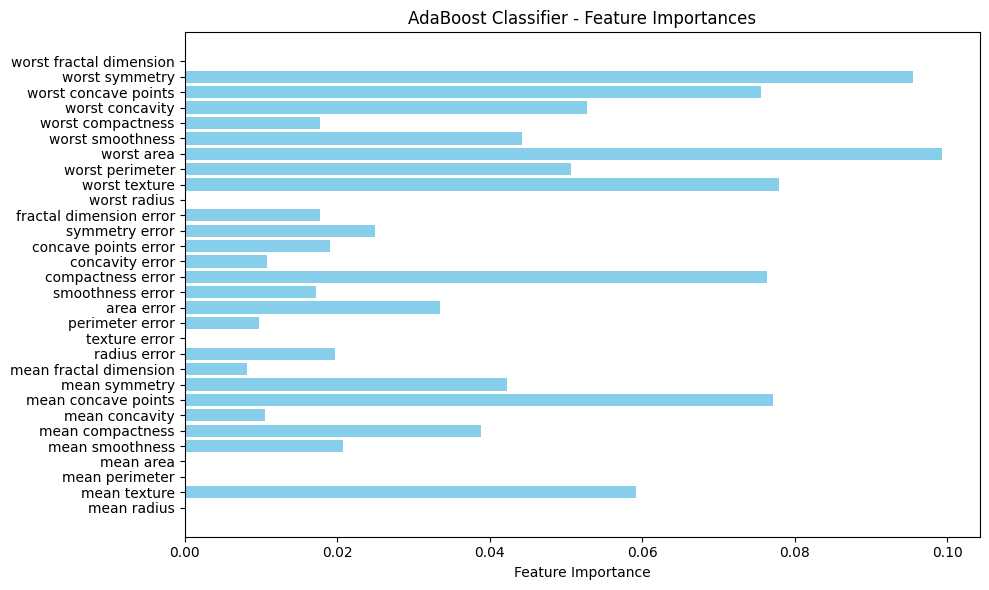

In [12]:
# 8.Train an AdaBoost Classifier and visualize feature importance
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Step 5: Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("AdaBoost Classifier - Feature Importances")
plt.tight_layout()
plt.show()


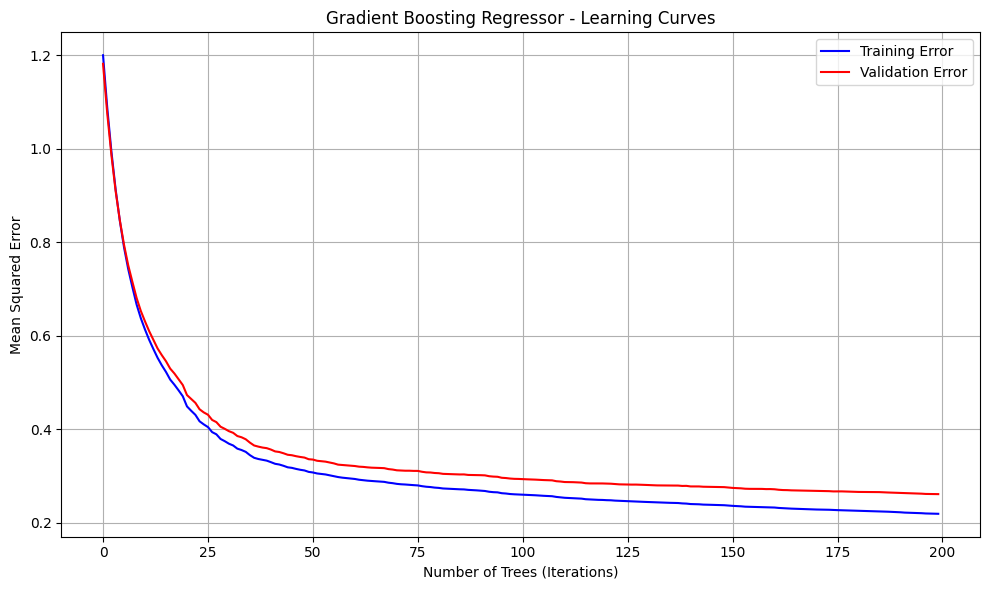

In [14]:
# 9.Train a Gradient Boosting Regressor and plot learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing # Changed from load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load dataset
housing = fetch_california_housing() # Changed from load_boston
X = housing.data
y = housing.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize model with staged predictions enabled
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 4: Track training and validation errors at each stage
train_errors = []
test_errors = []

for y_pred_train in model.staged_predict(X_train):
    train_errors.append(mean_squared_error(y_train, y_pred_train))

for y_pred_test in model.staged_predict(X_test):
    test_errors.append(mean_squared_error(y_test, y_pred_test))

# Step 5: Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Training Error", color="blue")
plt.plot(test_errors, label="Validation Error", color="red")
plt.xlabel("Number of Trees (Iterations)")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Regressor - Learning Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

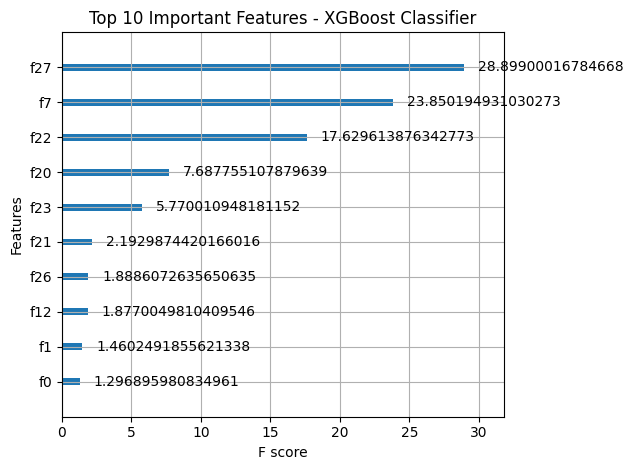

In [15]:
# 10.Train an XGBoost Classifier and visualize feature importance

from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 4: Visualize feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10, importance_type='gain')  # 'gain' shows contribution
plt.title("Top 10 Important Features - XGBoost Classifier")
plt.tight_layout()
plt.show()


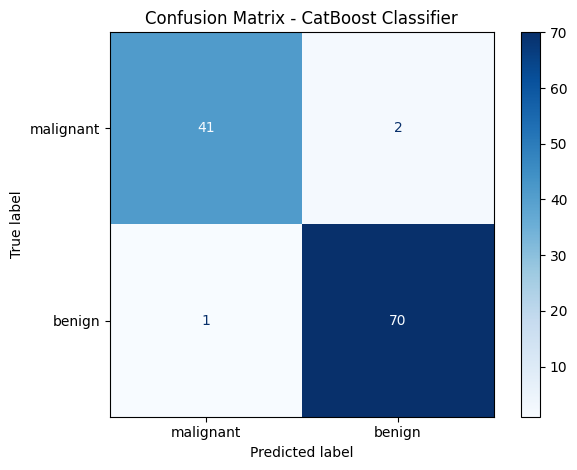

In [16]:
# 11. Train a CatBoost Classifier and plot the confusion matrix
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = model.predict(X_test)

# Step 5: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 6: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - CatBoost Classifier")
plt.tight_layout()
plt.show()


n_estimators = 10: Accuracy = 0.9649
n_estimators = 50: Accuracy = 0.9649
n_estimators = 100: Accuracy = 0.9737
n_estimators = 150: Accuracy = 0.9737
n_estimators = 200: Accuracy = 0.9737


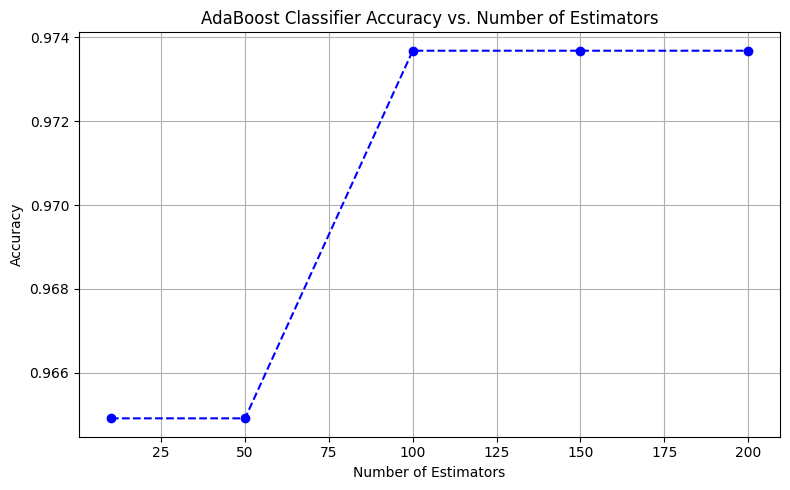

In [17]:
# 12.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define different numbers of estimators
n_estimators_list = [10, 50, 100, 150, 200]
accuracies = []

# Step 4: Train AdaBoost Classifier with different n_estimators
for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n}: Accuracy = {acc:.4f}")

# Step 5: Plot accuracy vs n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='--', color='blue')
plt.title("AdaBoost Classifier Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


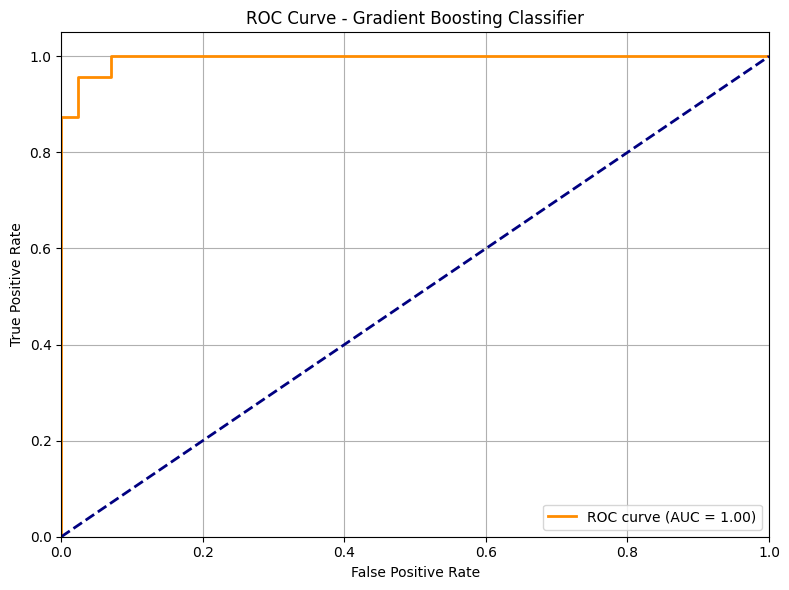

In [18]:
# 13. Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Step 5: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# 14.Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing # Changed from load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Load dataset
housing = fetch_california_housing() # Changed from load_boston
X = housing.data
y = housing.target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Step 4: Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Step 5: GridSearchCV for tuning learning rate
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

# Step 6: Fit the model
grid_search.fit(X_train, y_train)

# Step 7: Best parameters and model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Learning Rate:", grid_search.best_params_['learning_rate'])
print("Test MSE with Best Model:", mse)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Learning Rate: 0.2
Test MSE with Best Model: 0.21596203014190907


In [21]:
# 15.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import numpy as np

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, weights=[0.9, 0.1], random_state=42)

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train CatBoost without class weights
model_no_weights = CatBoostClassifier(verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

# Step 4: Train CatBoost with class weights
# Class 0 weight: 1.0, Class 1 weight: 9.0 (to counter imbalance)
class_weights = [1.0, 9.0]
model_with_weights = CatBoostClassifier(class_weights=class_weights, verbose=0, random_state=42)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

# Step 5: Evaluate performance using F1-Score
print("Without Class Weights:")
print(classification_report(y_test, y_pred_no_weights, digits=4))

print("\nWith Class Weights:")
print(classification_report(y_test, y_pred_with_weights, digits=4))


Without Class Weights:
              precision    recall  f1-score   support

           0     0.9171    1.0000    0.9568       177
           1     1.0000    0.3043    0.4667        23

    accuracy                         0.9200       200
   macro avg     0.9585    0.6522    0.7117       200
weighted avg     0.9266    0.9200    0.9004       200


With Class Weights:
              precision    recall  f1-score   support

           0     0.9305    0.9831    0.9560       177
           1     0.7692    0.4348    0.5556        23

    accuracy                         0.9200       200
   macro avg     0.8499    0.7089    0.7558       200
weighted avg     0.9119    0.9200    0.9100       200



Learning rate = 0.01: Accuracy = 0.9386
Learning rate = 0.05: Accuracy = 0.9561
Learning rate = 0.1: Accuracy = 0.9561
Learning rate = 0.2: Accuracy = 0.9649
Learning rate = 0.5: Accuracy = 0.9649
Learning rate = 1.0: Accuracy = 0.9737


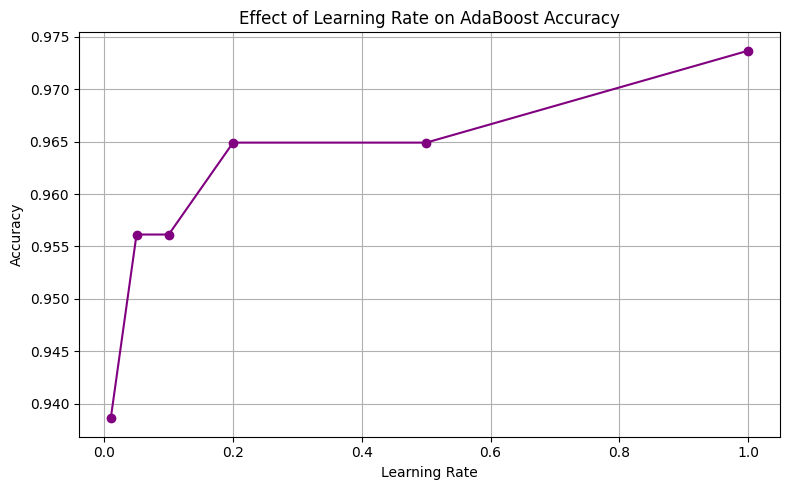

In [22]:
# 16. Train an AdaBoost Classifier and analyze the effect of different learning rates
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
accuracies = []

# Step 4: Train AdaBoost with each learning rate and evaluate accuracy
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning rate = {lr}: Accuracy = {acc:.4f}")

# Step 5: Plot accuracy vs learning rate
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='purple')
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# 17.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Step 1: Load multi-class dataset (Iris)
data = load_iris()
X = data.data
y = data.target

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train XGBoost Classifier
model = XGBClassifier(objective='multi:softprob', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities for test set
y_proba = model.predict_proba(X_test)

# Step 5: Compute log-loss
loss = log_loss(y_test, y_proba)
print(f"Log-Loss on test set: {loss:.4f}")


Log-Loss on test set: 0.0093
